<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment03/assignment03_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment03**
Name: Lee Suyoung


Student ID: 20164111

## **0. Install the package**



0.1 package for linear regression

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

0.2 package for 3d plotting

In [0]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

## **1. Input the data**

1.1 Load the data

In [4]:
uploaded=files.upload()
path = "data.csv"

data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]
num_data=len(x_data)

Saving data.csv to data (3).csv


1.2 Plotting the input data

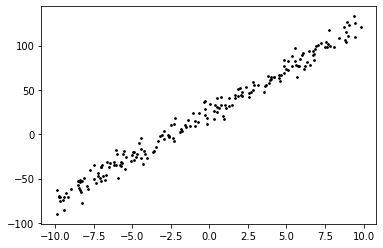

In [5]:
plt.scatter(x_data,y_data,c='k',s=3)
plt.show()

## **2. Relinear regression**

2.1 Set the variables

In [0]:
theta1=tf.Variable(tf.random_normal([1],name='weight'))
theta0=tf.Variable(tf.random_normal([1],name='bias'))
#theta1=tf.Variable(-30.0)
#theta0=tf.Variable(-30.0)

X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)


## hypothesis X*theta1+theta0
hypothesis= X*theta1+theta0

2.2 Cost function and Gradient descent

In [0]:
## Cost/loss function
cost= 0.5*tf.reduce_mean(tf.square(hypothesis-Y))

## Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

2.3 Fit the data

In [0]:
## Launch the graph in a session
sess=tf.Session()

## Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(3001):
    sess.run(train,feed_dict={X:x_data, Y:y_data})

2.4 Plotting the linear regression

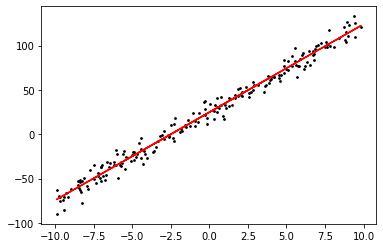

In [9]:
def fun_H(x):
    f=sess.run(theta1)*x+sess.run(theta0)
    return f
Y_plot=fun_H(x_data)

plt.scatter(x_data,y_data,color='black',s=3)
plt.plot(x_data,Y_plot,color='red')
plt.show()

## **3. Energy surface**

3.1 Define J function

In [0]:
def J(W,b,x,y,m):
  r=0
  for i in range(m):
    r=r+(b+W*x[i]-y[i])**2
    ans=0.5*1/m*r
  return ans

3.2 Set variables for 3d plotting

In [0]:
x_cost=np.arange(-30,30,0.1)
y_cost=np.arange(-30,30,0.1)
XX, YY = np.meshgrid(x_cost,y_cost)

3.3 Plotting the energy surface

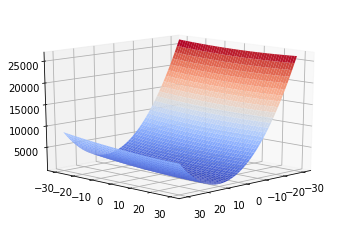

In [12]:
fig= plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(XX, YY,J(XX,YY,x_data,y_data,num_data),cmap=cm.coolwarm)
ax.view_init(15,45)
plt.show()

3.4 Find gradient decent (initial condition ​θ0=-30, θ1=-30​)

In [0]:
## set variable theta1=-30, theta0=-30
theta1=tf.Variable(-30.0)
theta0=tf.Variable(-30.0)

theta1_history=[]
theta0_history=[]
cost_history=[]

## hypothesis X*theta1+theta0
hypothesis= x_data*theta1+theta0


## cost/loss function
cost=J(theta1,theta0,x_data,y_data,num_data)

## Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)



##launch the graph in a session
sess=tf.Session()

##initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(3001):
    theta1_history.append(sess.run(theta1))
    theta0_history.append(sess.run(theta0))
    cost_history.append(sess.run(cost))
    sess.run(train)

3.5 Plotting the optimization path

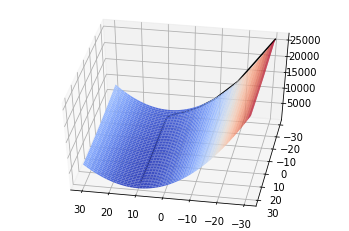

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(XX, YY,J(XX,YY,x_data,y_data,num_data),cmap=cm.coolwarm)
ax.plot(theta1_history,theta0_history,cost_history,color='black')
ax.view_init(45,100)